In [22]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [45]:
def read_history_data(filter_: str):
    paths = os.listdir("variables/")
    history_list = []
    for path in paths: 
        if not path.endswith(filter_): continue
        print(path)
        with open("variables/"+path, "rb") as f:
            history_list.append(pickle.load(f))
    return history_list

def get_metric(data_list, key):
    data = [np.array(x[key]) for x in data_list]
    data = np.vstack(tuple(data)) # (n_avg,n_iterations)
    return data

data1_list = read_history_data("modelpred_history.dat") # model pred
data2_list = read_history_data("1000_history.dat")

run1_1000_100_modelpred_history.dat
run2_1000_100_modelpred_history.dat
run3_1000_100_modelpred_history.dat
run4_1000_100_modelpred_history.dat
run5_1000_100_modelpred_history.dat
run1_1000_history.dat
run2_1000_history.dat
run3_1000_history.dat
run4_1000_history.dat
run5_1000_history.dat


In [33]:
print("keys:",list(data1_list[0].keys()))
x_axis = 1+np.arange(len(data1_list[0]["data_size"]))

keys: ['accuracy', 'precision', 'recall', 'F1', 'error_rate', 'n_errors', 'data_size']


In [48]:
data1_F1 = get_metric(data1_list, "F1")
data2_F1 = get_metric(data2_list, "F1")

(5, 40)


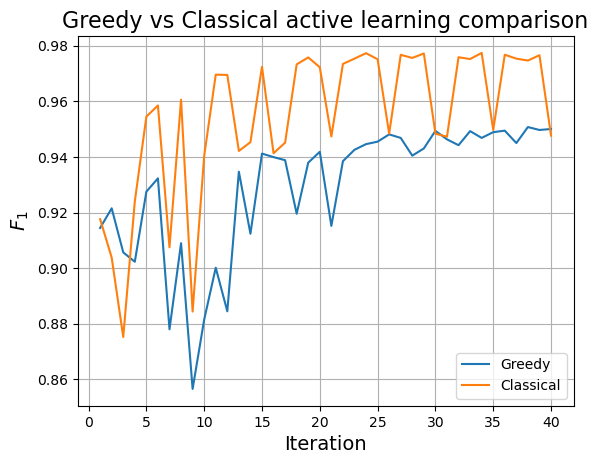

In [49]:
plt.plot(x_axis, data1_F1.mean(axis=0), label="Greedy")
plt.plot(x_axis, data2_F1.mean(axis=0), label="Classical")
plt.grid()
plt.legend(frameon=True, loc="lower right")
plt.title("Greedy vs Classical active learning comparison", fontsize=16)
plt.ylabel("$F_1$",fontsize=14)
plt.xlabel("Iteration",fontsize=14)
plt.show()

(5, 40)


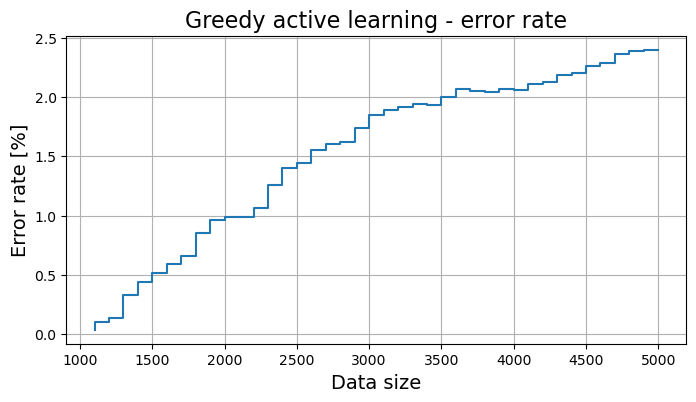

In [75]:
data1_error = get_metric(data1_list, "error_rate")
data1_size = get_metric(data1_list, "data_size")
print(data1_error.shape)
plt.figure(figsize=(8,4))
plt.step(data1_size[0,:], 100*data1_error.mean(axis=0))
plt.xlabel("Data size", fontsize=14)
plt.ylabel("Error rate [%]", fontsize=14)
plt.title("Greedy active learning - error rate", fontsize=16)
plt.grid()
plt.show()